In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Data/Data_Machine_Learning/Kaggle_Honey_Pesticide.csv')
data = data.dropna(axis='columns', how='all')
# Drop the null rows
data = data.dropna()
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,7696.2,3258.1,4149.6,0.0,0.0,15103.9
1,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,680.0,4230.2,5371.6,0.0,0.0,10281.8
2,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002,Alabama,South,0.0,1178.8,840.4,0.0,0.0,2019.2
3,AL,12000.0,87,1044000.0,282000.0,1.41,1472000.0,2004,Alabama,South,2676.4,1323.9,3863.9,0.0,0.0,7864.2
4,AL,13000.0,66,858000.0,266000.0,1.02,875000.0,2005,Alabama,South,1503.6,994.5,5493.9,0.0,0.0,7992.0


In [3]:
data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,761.000000,761.000000,7.610000e+02,7.610000e+02,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,62858.081472,59.724047,4.226796e+06,1.289880e+06,1.688594,5.576555e+06,2006.752957,10890.929304,10019.377661,6225.054008,729.025887,120.468988,27984.855848
std,93358.834279,18.547097,6.965583e+06,2.237819e+06,0.931687,9.529811e+06,5.458884,29821.711174,17234.345485,10237.763659,2574.475379,464.478136,50127.112520
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000,0.000000,3.200000,0.000000,0.000000,0.000000,3.200000
25%,9000.000000,46.000000,4.620000e+05,1.210000e+05,1.040000,8.920000e+05,2002.000000,0.000000,937.500000,29.700000,0.000000,0.000000,1631.800000
50%,27000.000000,57.000000,1.581000e+06,4.330000e+05,1.470000,2.122000e+06,2007.000000,336.700000,3698.900000,1156.300000,16.000000,0.000000,8402.100000
75%,65000.000000,70.000000,4.200000e+06,1.436000e+06,2.040000,5.599000e+06,2011.000000,6569.300000,10588.600000,7777.000000,349.100000,0.000000,33508.200000
max,510000.000000,128.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [4]:
# Assign the data to X and y

X = data[["nCLOTHIANIDIN", 
          "nIMIDACLOPRID", 
          "nTHIAMETHOXAM", 
          "nACETAMIPRID", 
          "nTHIACLOPRID",
          "nAllNeonic",
          "numcol",
          #"totalprod",
          #"stocks",
          #"priceperlb",
          #"yieldpercol",
          #"prodvalue"
         ]]
y = data["totalprod"].values.reshape(-1, 1)
print(X.shape, y.shape)

(761, 7) (761, 1)


In [5]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [8]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

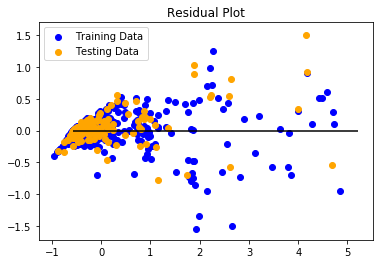

In [9]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [10]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06199107299963252, R2: 0.9101686132983023


In [11]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05786675973643768, R2: 0.9161451638191684


In [12]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.061986113324132626, R2: 0.9101758003738954


In [13]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05850348916482649, R2: 0.9152224779429893


## Save Models

In [14]:
import joblib
filename = 'kaggle_LRE_Linear.sav'
joblib.dump(model, filename)

['kaggle_LRE_Linear.sav']

In [15]:
filename = 'kaggle_LRE_Elastic.sav'
joblib.dump(elasticnet, filename)

['kaggle_LRE_Elastic.sav']

In [16]:
filename = 'kaggle_LRE_Lassso.sav'
joblib.dump(lasso, filename)

['kaggle_LRE_Lassso.sav']

In [17]:
filename = 'kaggle_LRE_Ridge.sav'
joblib.dump(ridge, filename)

['kaggle_LRE_Ridge.sav']

## Test Models

In [18]:
X = pd.DataFrame({"nCLOTHIANIDIN":[7696], 
          "nIMIDACLOPRID":[3258], 
          "nTHIAMETHOXAM":[4149], 
          "nACETAMIPRID":[0], 
          "nTHIACLOPRID":[0],
          "nAllNeonic":[15103],
          "numcol":[11000]})

In [19]:
model_2 = joblib.load('kaggle_model.sav')

In [20]:
model_2.predict(X)

array([[753606.14469239]])

In [21]:
elastic_2 = joblib.load('kaggle_LRE_Elastic.sav')

In [22]:
elastic_2.predict(X)

array([11037.22592402])

In [23]:
lasso_2 = joblib.load('kaggle_LRE_Lassso.sav')

In [24]:
lasso_2.predict(X)

array([10954.63606326])

In [25]:
ridge_2 = joblib.load('kaggle_LRE_Ridge.sav')

In [26]:
ridge_2.predict(X)

array([[11154.66629617]])